* Data Collection Reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-01-read_html.ipynb
* Data analysis reference: https://github.com/corazzon/cracking-the-pandas-cheat-sheet/blob/master/seoul-covid-19-02-eda.ipynb

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2020-09-06


In [2]:
import pandas as pd
import numpy as np

In [3]:
# target url for the covid19 data: Seoul City
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
# read all table datas in the web html template
tables = pd.read_html(url)
tables

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   67   54  107  102  110   129  165  297  125  146  258  202  102
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2  142  155  232  152   76   150  182  279  157  209  271  165  280,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    67   54  107  102  110  129
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2   165  297  125  146  258  202
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4   102  142  155  232  152   76
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6   150  182  279  157  209  271
 7   강동구   기타  NaN  NaN  NaN  NaN
 8   165  280  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  강동구 소재 콜센터  송파구 소재 물류센터  8.15 서울도심 집회  광진구 소재 병원  \
 0  4314     393          16            4           120         18   
 
    동작구 카드발급 업체  영등포구 권능 교회  노원구 빛가온 교회  노원 기도 모임  서초구 장애인 교육시설  성북구 사랑제일 교회  \
 0           28          18          40         9             7          639   
 
    도봉구 운동 시설  송파구 소재 병원  중랑구 채육 시설  성북구 체대 입시  동작구 서울 신학교  타 시·도 확진자 접촉자  \
 

In [5]:
# index the table with covid19 patient data
tables[-2]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4314,21092,09.05.,기타,-,동작구 카드 발급업체,NaN
1,4313,21150,09.05.,기타,-,강동구 소재 콜센터,NaN
2,4312,21145,09.05.,기타,-,강동구 소재 콜센터,NaN
3,4311,21144,09.05.,기타,-,강동구 소재 콜센터,NaN
4,4310,21155,09.05.,강동구,-,강동구 소재 콜센터,NaN
...,...,...,...,...,...,...,...
4309,5,9,1.31.,성북구,-,#5 접촉,퇴원
4310,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
4311,3,6,1.30.,종로구,-,#3 접촉,퇴원
4312,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [6]:
# get number of confirmed cases and numbers of columns
df = tables[-2]
df.shape

(4314, 7)

In [7]:
# peek at the dataframe
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4314,21092,09.05.,기타,-,동작구 카드 발급업체,NaN
1,4313,21150,09.05.,기타,-,강동구 소재 콜센터,NaN
2,4312,21145,09.05.,기타,-,강동구 소재 콜센터,NaN
3,4311,21144,09.05.,기타,-,강동구 소재 콜센터,NaN
4,4310,21155,09.05.,강동구,-,강동구 소재 콜센터,NaN


In [8]:
# most upto-date data
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'09_05_'

In [9]:
# naming file and setting the path
dataset_path = "./dataset/"
file_name = f"seoul_covid_{last_day}.csv"
file_path = dataset_path + file_name
file_path

'./dataset/seoul_covid_09_05_.csv'

In [10]:
df.to_csv(file_path, index=False)

In [11]:
# reed the covid dataset
df = pd.read_csv(file_path)

In [12]:
# sort according to the patient number
df = df.sort_values(["연번"], ascending=False)
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,4314,21092,09.05.,기타,-,동작구 카드 발급업체,NaN
1,4313,21150,09.05.,기타,-,강동구 소재 콜센터,NaN
2,4312,21145,09.05.,기타,-,강동구 소재 콜센터,NaN
3,4311,21144,09.05.,기타,-,강동구 소재 콜센터,NaN
4,4310,21155,09.05.,강동구,-,강동구 소재 콜센터,NaN
5,4309,21154,09.05.,강동구,-,강동구 소재 콜센터,NaN
6,4308,21153,09.05.,강동구,-,강동구 소재 콜센터,NaN
7,4307,21152,09.05.,강동구,-,강동구 소재 콜센터,NaN
8,4306,21151,09.05.,강동구,-,강동구 소재 콜센터,NaN
9,4305,21125,09.05.,양천구,-,강동구 소재 콜센터,NaN


In [13]:
df_etc = df[df['접촉력'].str.match("기타")]
print(df_etc.shape)
df_etc.sample(15)

(501, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
1588,2726,16775,8.21.,강남구,-,기타 확진자 접촉,NaN
204,4110,20623,9.02.,관악구,-,기타 확진자 접촉,NaN
262,4052,20110,9.01.,도봉구,-,기타 확진자 접촉,NaN
445,3869,19987,8.31.,동작구,-,기타 확진자 접촉,NaN
88,4226,20908,9.04.,중구,-,기타 확진자 접촉,NaN
124,4190,20823,9.03.,강동구,-,기타 확진자 접촉,NaN
1681,2633,16912,8.21.,동작구,-,기타 확진자 접촉,NaN
632,3682,19605,8.29.,송파구,-,기타 확진자 접촉,NaN
207,4107,20579,9.02.,서초구,-,기타 확진자 접촉,NaN
1375,2939,17528,8.23.,중랑구,-,기타 확진자 접촉,NaN


In [54]:
# number of patients involved in church
df_church = df[df['접촉력'].str.contains("교회")]
church_infected_proportion = "{0:.0%}".format(round(len(df_church)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion}")
df_church.sample(5)

number of patients incurred from church: 23%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1550,2764,17157,8.22.,중구,-,성북구 사랑제일교회 관련,NaN,2020-08-22,8,34,08-22
3884,430,9642,3.29.,금천구,-,구로구 교회 관련,퇴원,2020-03-29,3,13,03-29
2027,2287,15960,8.18.,중랑구,-,성북구 사랑제일교회 관련,퇴원,2020-08-18,8,34,08-18
1467,2847,17267,8.22.,강동구,-,성북구 사랑제일교회 관련,NaN,2020-08-22,8,34,08-22
2072,2242,15744,8.18.,기타,-,성북구 사랑제일교회 관련,퇴원,2020-08-18,8,34,08-18


In [55]:
# number of patients involved in church other than 사랑제일교회
df_church_2 = df[(df["접촉력"].str.contains("교회") == True) & (df["접촉력"].str.contains("사랑제일교회") == False)]
church_infected_proportion2 = "{0:.0%}".format(round(len(df_church_2)/len(df), 3))
print(f"number of patients incurred from church: {church_infected_proportion2}")
df_church_2.head(5)

number of patients incurred from church: 8%


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
29,4285,21113,09.05.,서초구,-,영등포구 권능교회,NaN,2020-09-05,9,36,09-05
35,4279,21107,09.05.,노원구,-,노원구 빛가온교회 관련,NaN,2020-09-05,9,36,09-05
64,4250,20979,9.04.,노원구,-,노원구 빛가온교회 관련,NaN,2020-09-04,9,36,09-04
75,4239,20960,9.04.,노원구,-,노원구 빛가온교회 관련,NaN,2020-09-04,9,36,09-04
142,4172,20719,9.03.,노원구,-,노원구 빛가온교회 관련,NaN,2020-09-03,9,36,09-03


In [56]:
# count the number of daily confirmed cases
df["확진일"].value_counts()

8.26.    153
8.18.    151
8.15.    146
8.27.    146
8.22.    140
        ... 
5.01.      1
2.2.       1
4.20.      1
2.7.       1
4.30.      1
Name: 확진일, Length: 201, dtype: int64

In [57]:
df["확진일"].head(4)

0    09.05.
1    09.05.
2    09.05.
3    09.05.
Name: 확진일, dtype: object

In [58]:
# transform date(string) into datetime object
df["확진일자"] = pd.to_datetime("2020"+"-"+df["확진일"].str.replace(".","-"))
df["확진일자"].head()

0   2020-09-05
1   2020-09-05
2   2020-09-05
3   2020-09-05
4   2020-09-05
Name: 확진일자, dtype: datetime64[ns]

In [59]:
# extract month, add column for the month
df["월"] = df["확진일자"].dt.month

In [60]:
# extract week, add column for the week
df["주"] = df["확진일자"].dt.week

In [61]:
# make a new column "월일" with datetime format
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4314,21092,09.05.,기타,-,동작구 카드 발급업체,NaN,2020-09-05,9,36,09-05
1,4313,21150,09.05.,기타,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
2,4312,21145,09.05.,기타,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05


## Visualization

In [62]:
import matplotlib.pyplot as plt

# font designation
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

In [63]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

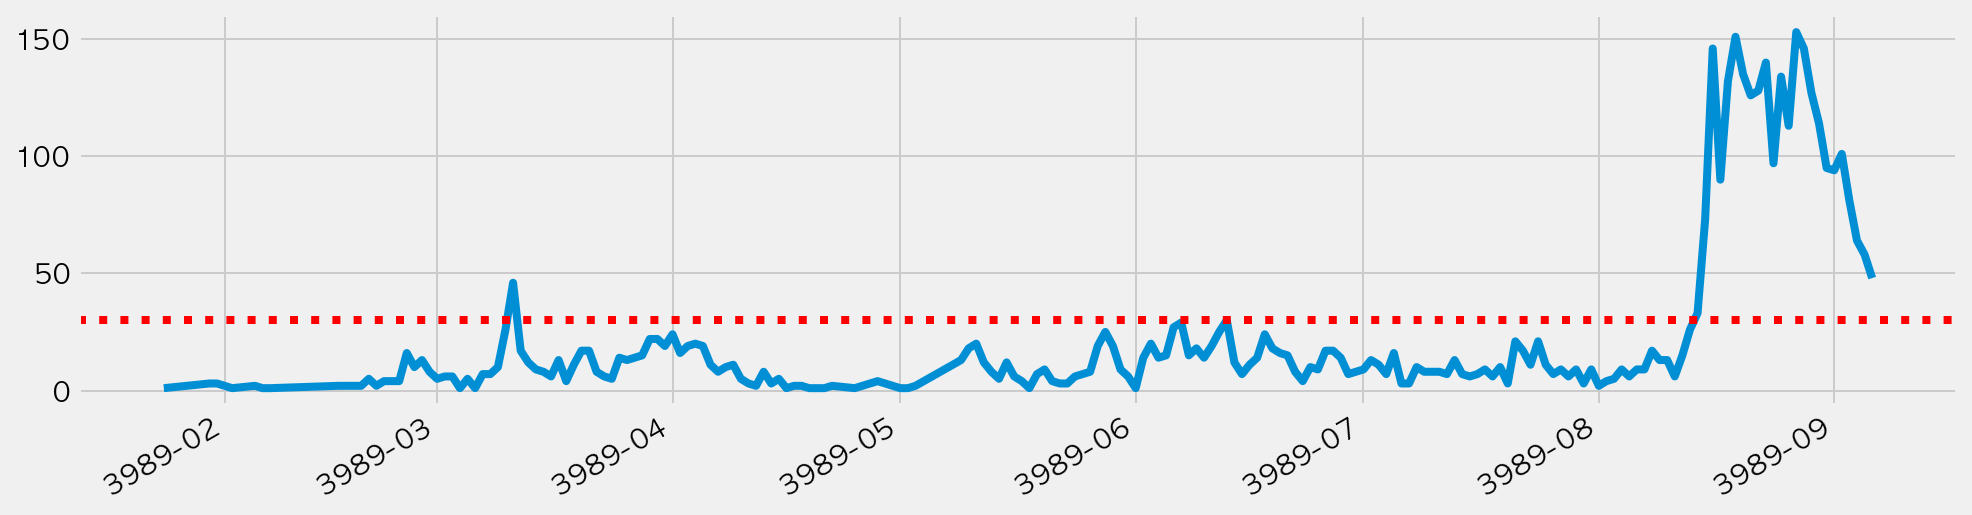

In [64]:
# plot total number of patients graph
df["확진일자"].value_counts().sort_index().plot(figsize=(15,4), rot=30, grid=True)
plt.axhline(30, linestyle=":", color="red")

In [65]:
df.head(15)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
0,4314,21092,09.05.,기타,-,동작구 카드 발급업체,NaN,2020-09-05,9,36,09-05
1,4313,21150,09.05.,기타,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
2,4312,21145,09.05.,기타,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
3,4311,21144,09.05.,기타,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
4,4310,21155,09.05.,강동구,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
5,4309,21154,09.05.,강동구,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
6,4308,21153,09.05.,강동구,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
7,4307,21152,09.05.,강동구,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
8,4306,21151,09.05.,강동구,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05
9,4305,21125,09.05.,양천구,-,강동구 소재 콜센터,NaN,2020-09-05,9,36,09-05


In [66]:
# take a peek at daily confirmed cases statistics
# 'count' is number of days elasped since covid19 outbreak. Rest of statistics are involved with confirmed cases.
day_count = df["월일"].value_counts().sort_index()
day_count.describe()

count    197.000000
mean      21.898477
std       34.750714
min        1.000000
25%        5.000000
50%        9.000000
75%       18.000000
max      153.000000
Name: 월일, dtype: float64

In [67]:
# get 10 days of recent confirmed cases
day_count[-10:]

08-27    146
08-28    127
08-29    114
08-30     95
08-31     94
09-01    101
09-02     81
09-03     64
09-04     58
09-05     48
Name: 월일, dtype: int64

In [68]:
# get maximum number of confirmed cases
day_count[day_count == day_count.max()]

08-26    153
Name: 월일, dtype: int64

In [69]:
# get dataframe corresponding to a selected date
df_day = df[df["월일"]=="08-24"]
df_day.head(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1194,3120,17828,8.24.,노원구,-,확인 중,NaN,2020-08-24,8,35,08-24
1195,3119,17903,8.24.,성동구,-,8.15도심집회,NaN,2020-08-24,8,35,08-24
1196,3118,17913,8.24.,광진구,-,8.15도심집회,NaN,2020-08-24,8,35,08-24
1197,3117,17876,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1198,3116,17866,8.24.,광진구,-,확인 중,NaN,2020-08-24,8,35,08-24
1199,3115,17656,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1200,3114,17618,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1201,3113,17598,8.24.,기타,-,8.15도심집회(녹색병원),NaN,2020-08-24,8,35,08-24
1202,3112,17594,8.24.,기타,-,확인 중,NaN,2020-08-24,8,35,08-24
1203,3111,17553,8.24.,성북구,-,확인 중,NaN,2020-08-24,8,35,08-24


In [70]:
# Covid19 infection classified with patients' contact to the disease
number_of_paths = len(df["접촉력"].unique()) # get unique value for types of contagion route 
print(f"Total number of paths for infection: {number_of_paths}")
df["접촉력"].unique()

Total number of paths for infection: 233


array(['동작구 카드 발급업체', '강동구 소재 콜센터', '기타 확진자 접촉', '확인 중', '타시도 확진자 접촉',
       '영등포구 권능교회', '서초구 장애인교육시설', '노원구 빛가온교회 관련', '송파구 소재 물류센터',
       '광진구 소재병원', '8.15도심집회', '노원구 기도모임', '송파구 소재 병원', '강동구 소재 병원',
       '성북구 사랑제일교회 관련', '도봉구 운동시설', '강동구 소개 콜센터', '다래경매 관련', '성북구 체대입시',
       '성북구 요양시설', '중구 소재 은행', '중랑구 소재 체육시설', '관악구 판매업소', '동작구 소재 서울신학교',
       '용인시 우리제일교회 관련', '노원구 손해보험 관련', '구로구 보성운수', '강서구 서울대효요양병원',
       '서대문구 지인모임', '강북구 일가족', '중구 하나은행본점', '강서구 보안회사', '롯데리아 종사자 모임',
       '해외 접촉 추정', '8.15도심집회(순복음 강북교회)', '구로구 아파트 관련', '강남구 소재 아파트',
       '제주 게스트하우스 관련', '성북구 벧엘장로교회', '중앙보훈병원', '관악구 김혜근의원', '동대문구 sk탁구클럽',
       '동작구 스터디카페', '극단 산 관련', 'KT가좌지사 관련', '군인권센터', '동작구 요양시설 관련',
       '여의도 순복음교회 관련', '중구 보험회사(현대해상)', '강서구 병원관련', '종로구 혜화경찰서 관련',
       '양천구 되새김교회 관련', '현대커머셜', '8.15도심집회(녹색병원)', '영등포 IFC몰 오케스트로',
       '고양시 반석교회(케네디상가) 관련', '롯데 자산개발 관련', '골드트레인', '한양대병원', '은평구 헤어콕 관련',
       '순복음 강북교회', '서대문구 지인 모임', '강동구 어린이집', '광화문집회 관련', '성북구 체대입시 관련',
       '은평구 성경

In [71]:
# get two arrays of unknown route for contagion (미확인경로 확진자)
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [72]:
# overwrite whatever cell value that contains "확인" as "확인 중"
df.loc[df["접촉력"].str.contains("확인"),"접촉력"] = "확인 중"

# check whether those two arrays are combined
df.loc[df["접촉력"].str.contains("확인"),"접촉력"].unique()

array(['확인 중'], dtype=object)

In [73]:
df["접촉력"].value_counts().head(20)

확인 중             713
성북구 사랑제일교회 관련    638
기타 확진자 접촉        501
해외 접촉 추정         370
타시도 확진자 접촉       162
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
광화문집회 관련          56
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
노원구 빛가온교회 관련      40
8.15도심집회          39
수도권 개척교회 관련       37
콜센터직원 접촉          37
극단 산 관련           36
강남구 사무실 관련        36
구로구 아파트 관련        35
Name: 접촉력, dtype: int64

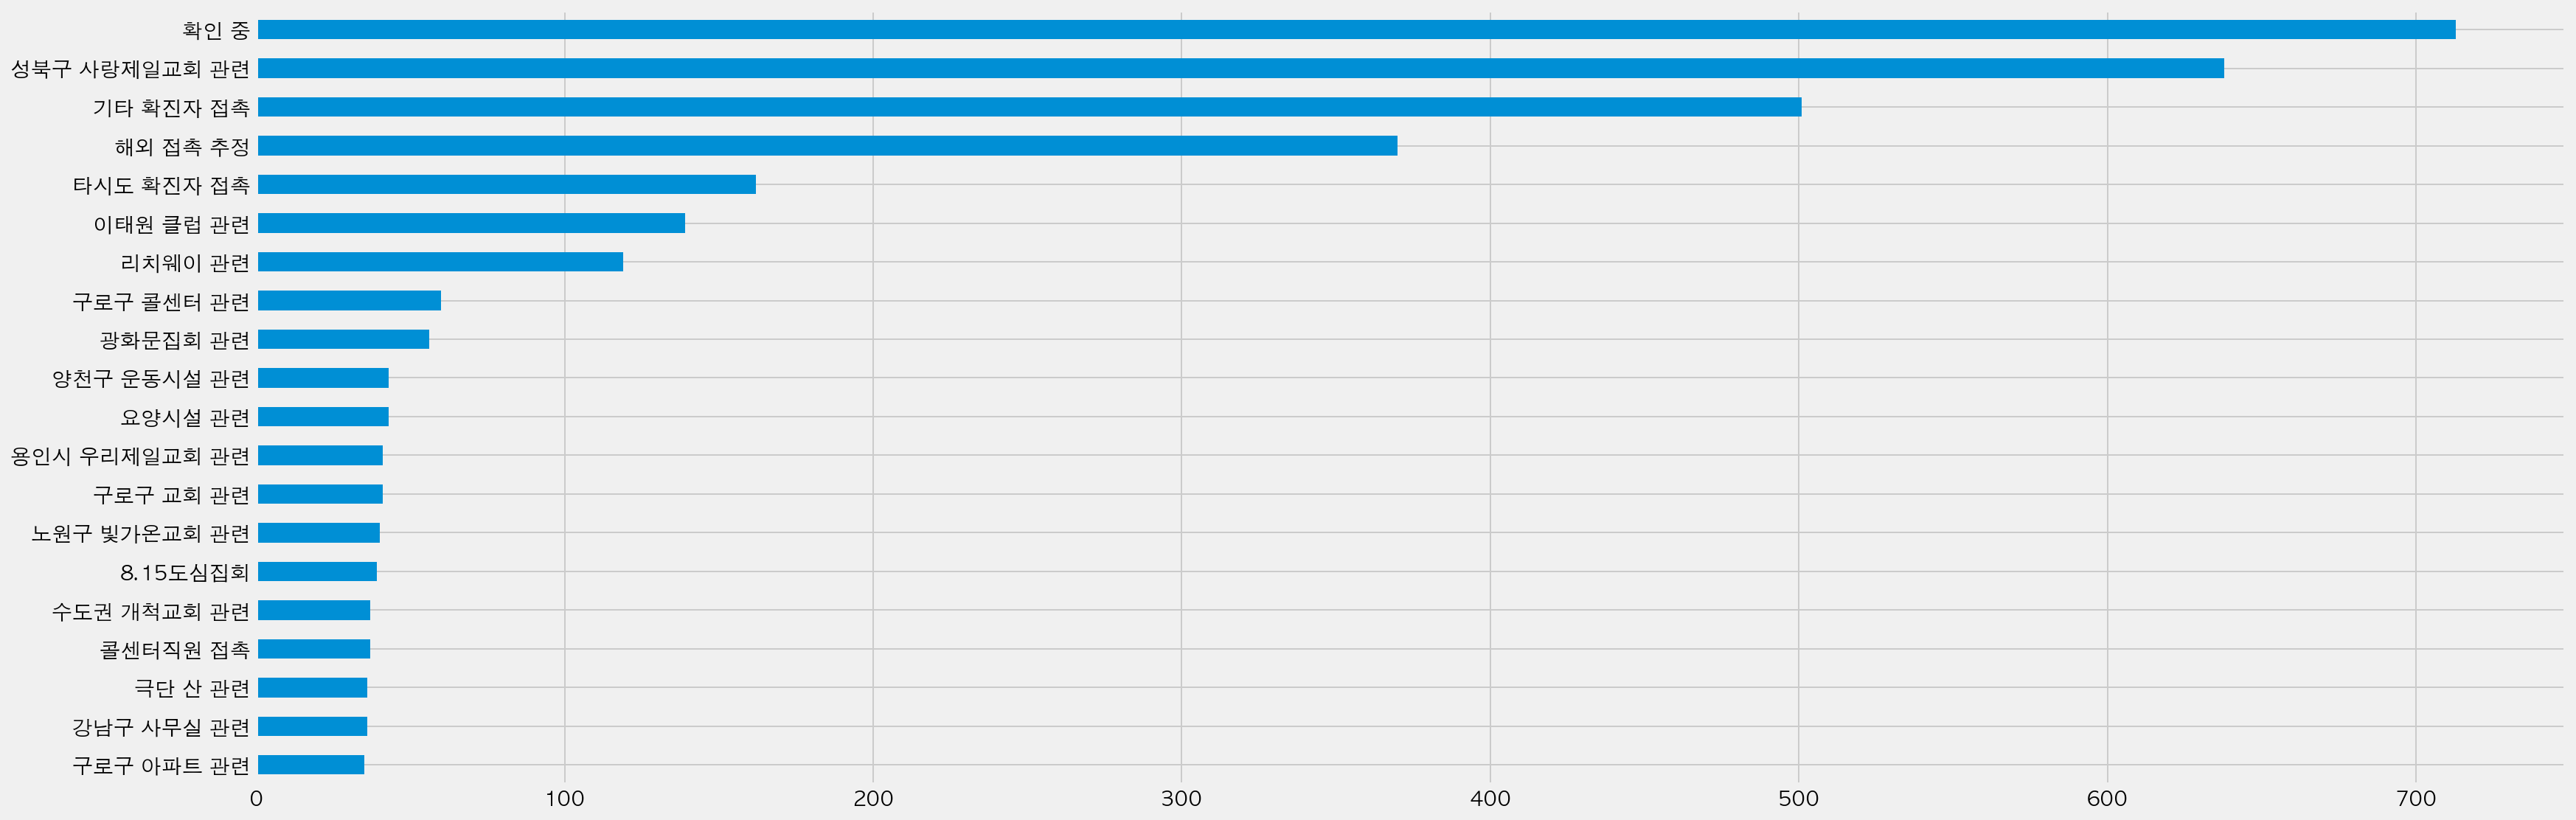

In [74]:
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(20)
g = contact_count_top.plot.barh(figsize=(25,9))

In [75]:
figure_ranked = g.get_figure()
figure_ranked.savefig("./img/confirmed_path_rank.png")

In [76]:
top_contact = df["접촉력"].value_counts().head(15)
top_contact

확인 중             713
성북구 사랑제일교회 관련    638
기타 확진자 접촉        501
해외 접촉 추정         370
타시도 확진자 접촉       162
이태원 클럽 관련        139
리치웨이 관련          119
구로구 콜센터 관련        60
광화문집회 관련          56
양천구 운동시설 관련       43
요양시설 관련           43
구로구 교회 관련         41
용인시 우리제일교회 관련     41
노원구 빛가온교회 관련      40
8.15도심집회          39
Name: 접촉력, dtype: int64

## 감염경로 불명

In [77]:
df_untracked = df[df["접촉력"]=="확인 중"]
df_untracked

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
18,4296,20976,09.03.,강서구,-,확인 중,NaN,2020-09-03,9,36,09-03
19,4295,20912,09.04.,성북구,-,확인 중,NaN,2020-09-04,9,36,09-04
20,4294,20958,09.05.,강남구,-,확인 중,NaN,2020-09-05,9,36,09-05
21,4293,20591,09.04.,송파구,-,확인 중,NaN,2020-09-04,9,36,09-04
22,4292,20934,09.05.,기타,-,확인 중,NaN,2020-09-05,9,36,09-05
...,...,...,...,...,...,...,...,...,...,...,...
4258,56,1768,2.25.,고양시,-,확인 중,퇴원,2020-02-25,2,9,02-25
4272,42,1370,2.25.,노원구,-,확인 중,퇴원,2020-02-25,2,9,02-25
4275,39,924,2.25.,평택,-,확인 중,퇴원,2020-02-25,2,9,02-25
4276,38,907,2.25.,관악구,-,확인 중,퇴원,2020-02-25,2,9,02-25


<AxesSubplot:xlabel='월,주'>

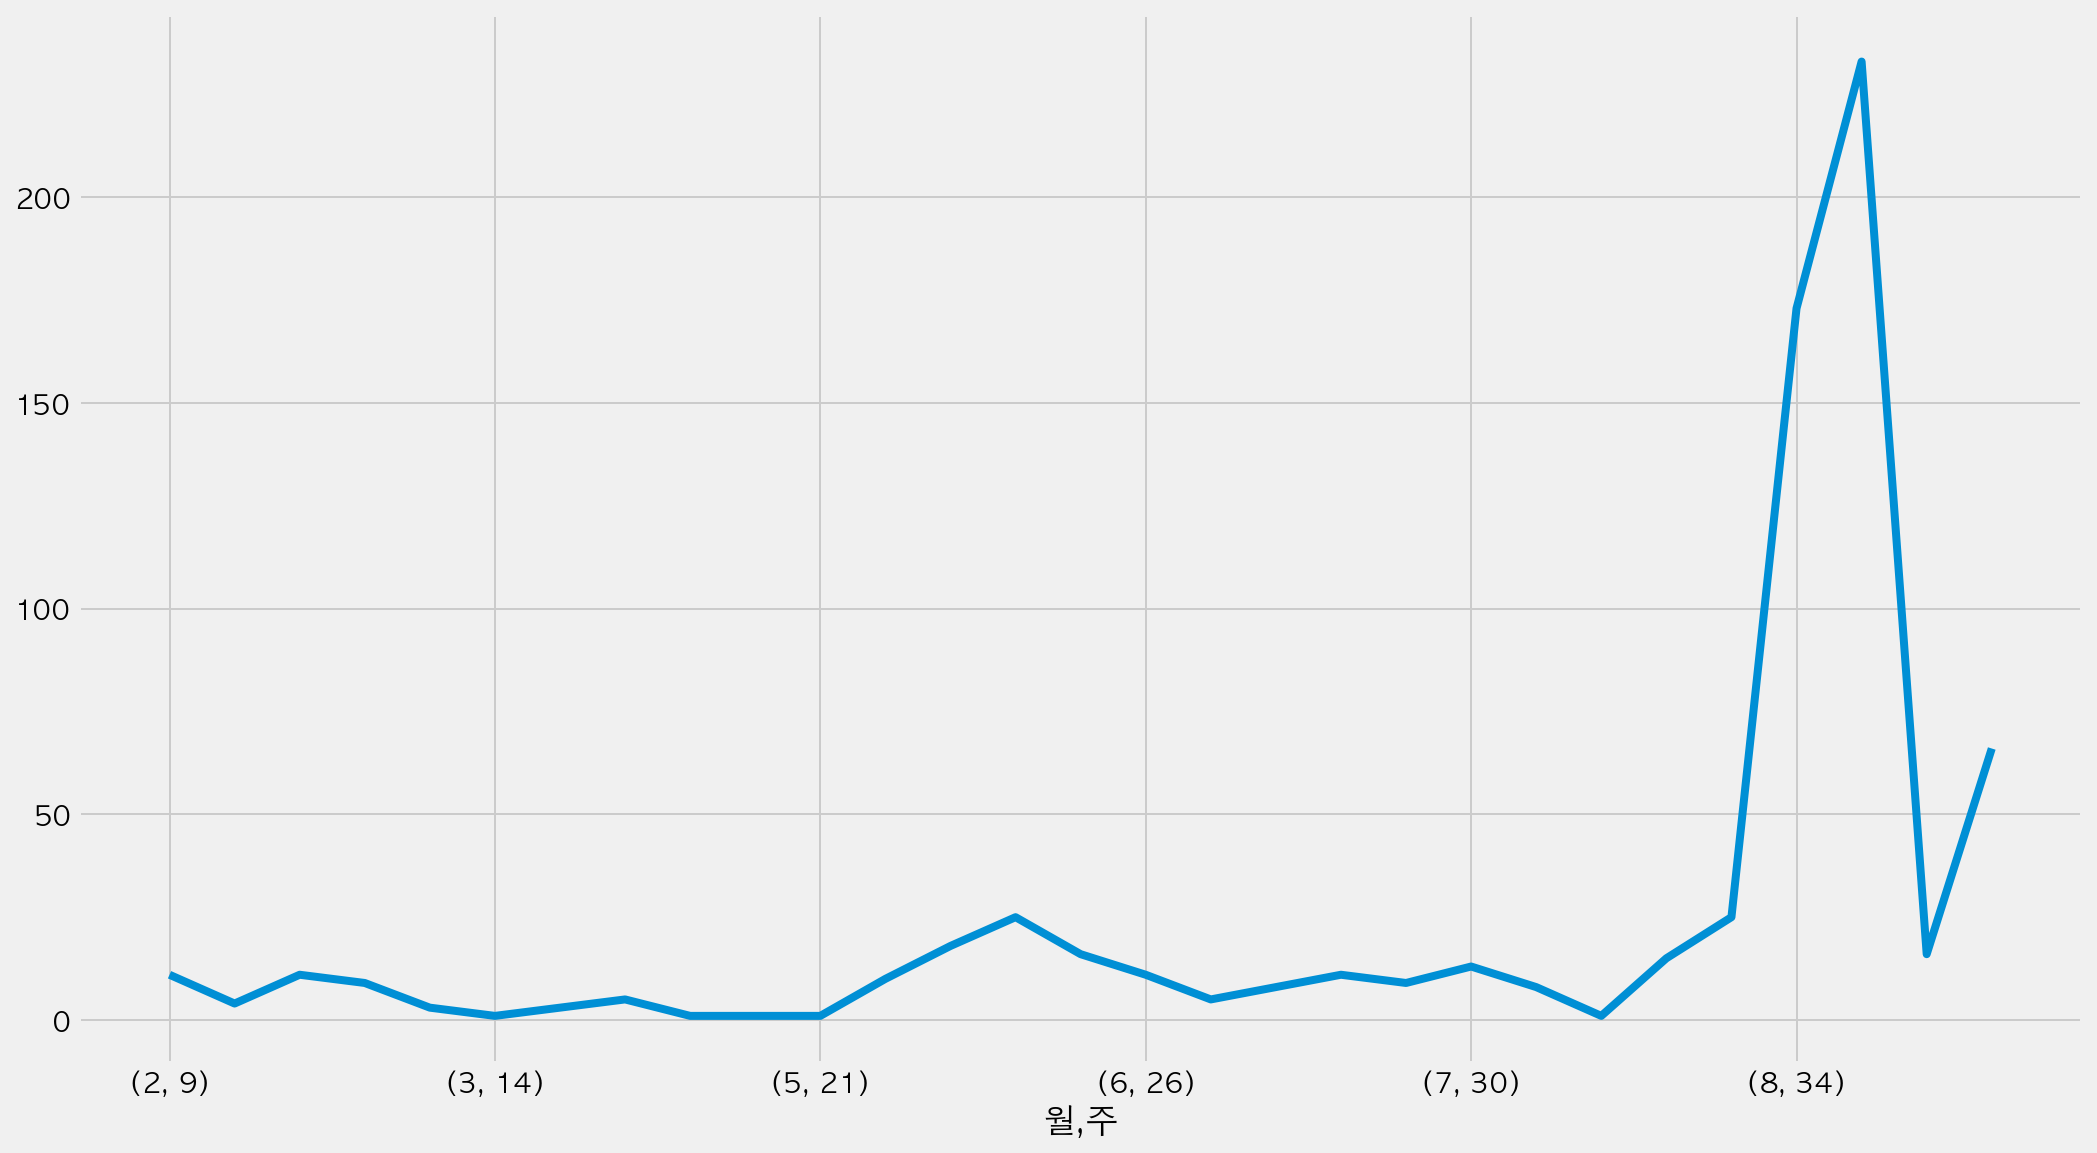

In [78]:
untracked_weekly_case = df_untracked.groupby(["월","주"])["연번"].count()
untracked_weekly_case.plot(figsize=(16,9))

In [79]:
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진자수"]
all_weekly_case.head()

,전체확진자수
34,909
35,882
36,446
33,389
23,134


In [80]:
untracked_weekly_case = df_untracked["주"].value_counts().to_frame()
untracked_weekly_case.columns = ["불명확진수"]
untracked_weekly_case.head()

,불명확진수
35,233
34,173
36,82
24,25
33,25


In [81]:
comparison = all_weekly_case.merge(untracked_weekly_case, left_index=True, right_index=True).sort_index()
comparison

,전체확진자수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,9
13,105,3
14,128,4
15,47,5
16,15,1
20,48,1
21,39,1


In [82]:
comparison[-4:]

,전체확진자수,불명확진수
33,389,25
34,909,173
35,882,233
36,446,82


<AxesSubplot:>

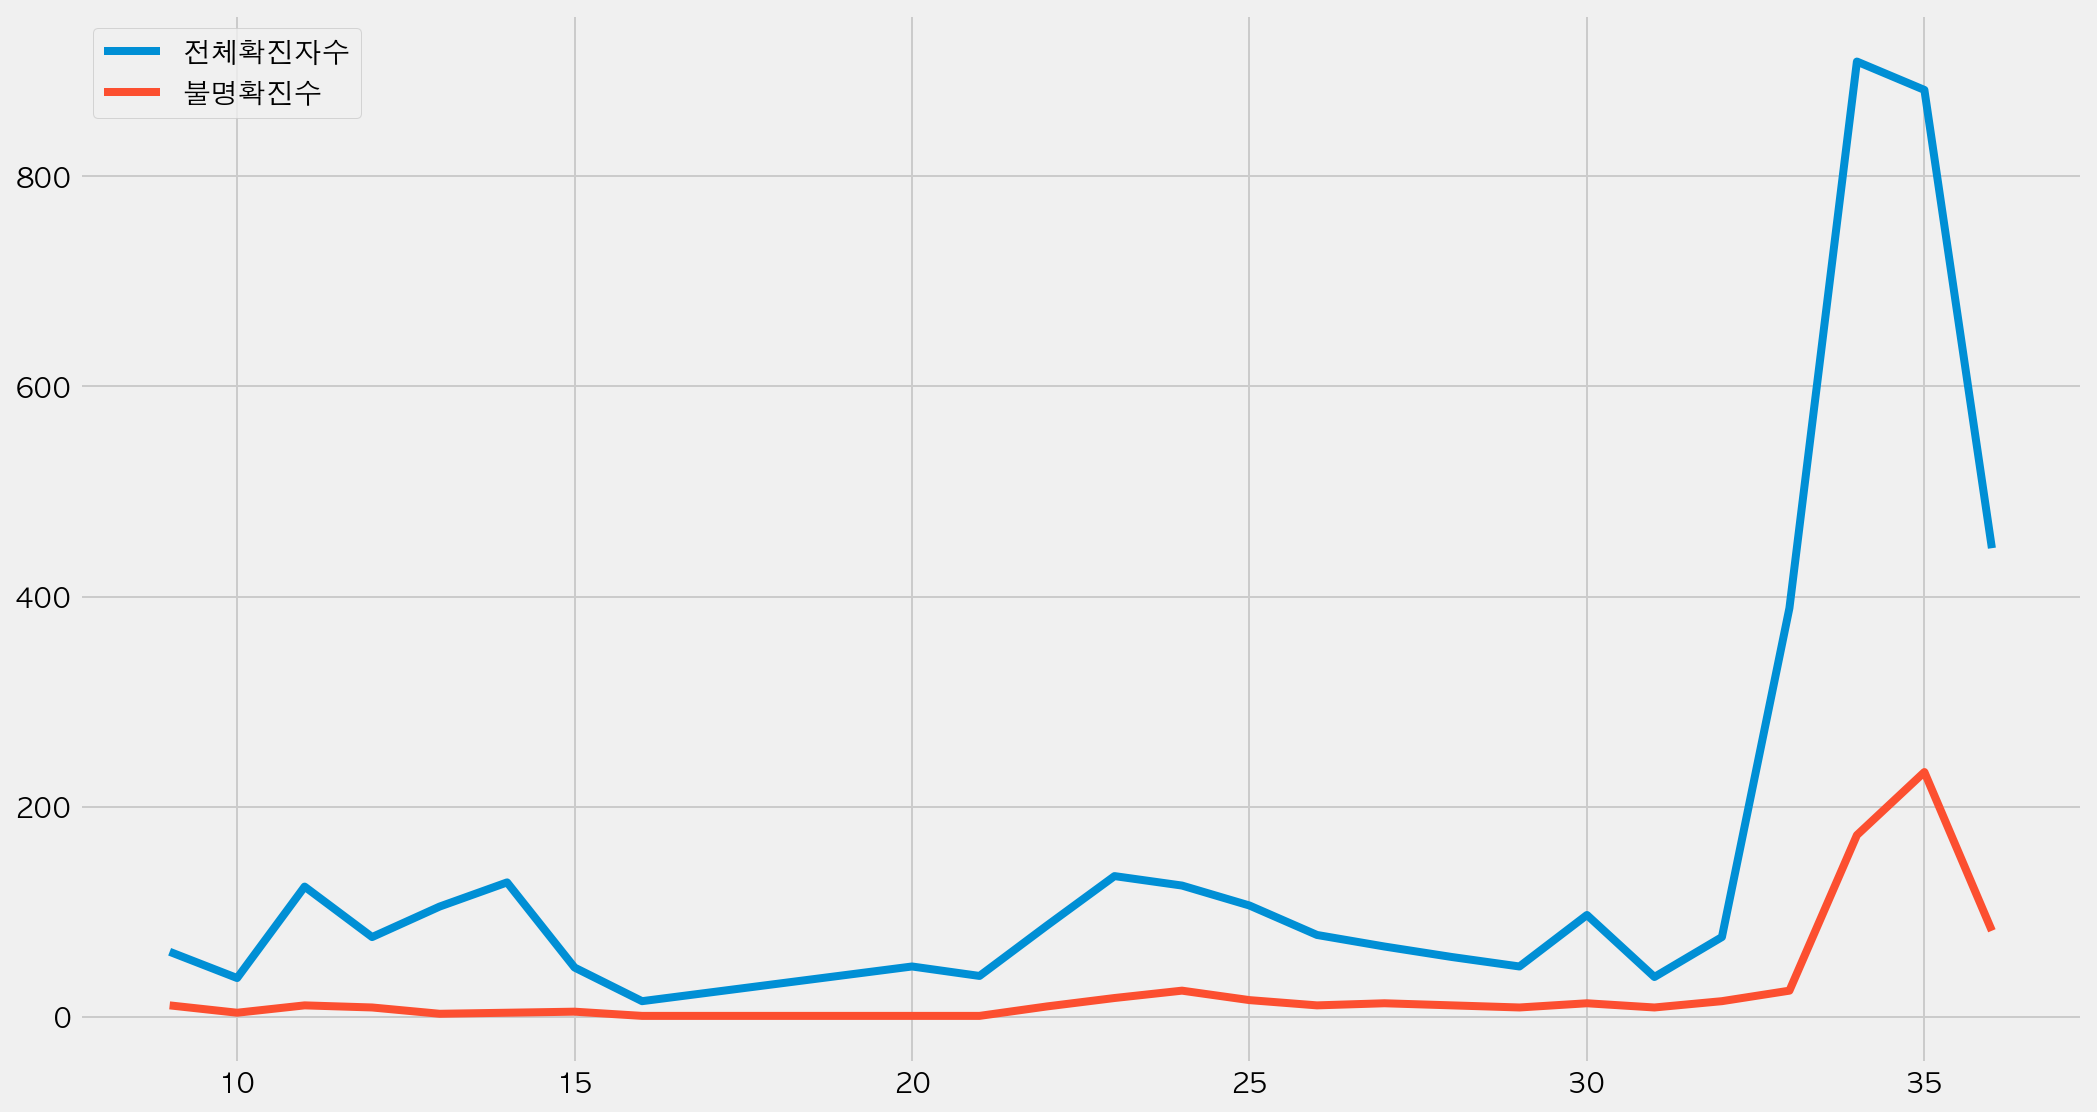

In [83]:
compare_graph = comparison.plot(figsize=(16,9))
compare_graph


In [84]:
fig_compare = compare_graph.get_figure()
fig_compare.savefig('./img/confirmed_vs_unconfirmed.png')

In [85]:
percentages = (comparison["불명확진수"] / comparison["전체확진자수"]) * 100
percentages

9     17.741935
10    10.810811
11     8.870968
12    11.842105
13     2.857143
14     3.125000
15    10.638298
16     6.666667
20     2.083333
21     2.564103
22    11.494253
23    13.432836
24    20.000000
25    15.094340
26    14.102564
27    19.402985
28    19.298246
29    18.750000
30    13.402062
31    23.684211
32    19.736842
33     6.426735
34    19.031903
35    26.417234
36    18.385650
dtype: float64

In [86]:
percentages[-4:]

33     6.426735
34    19.031903
35    26.417234
36    18.385650
dtype: float64

20.0
19.402985074626866
19.298245614035086
18.75
23.684210526315788
19.736842105263158
19.03190319031903
26.417233560090704
18.385650224215247


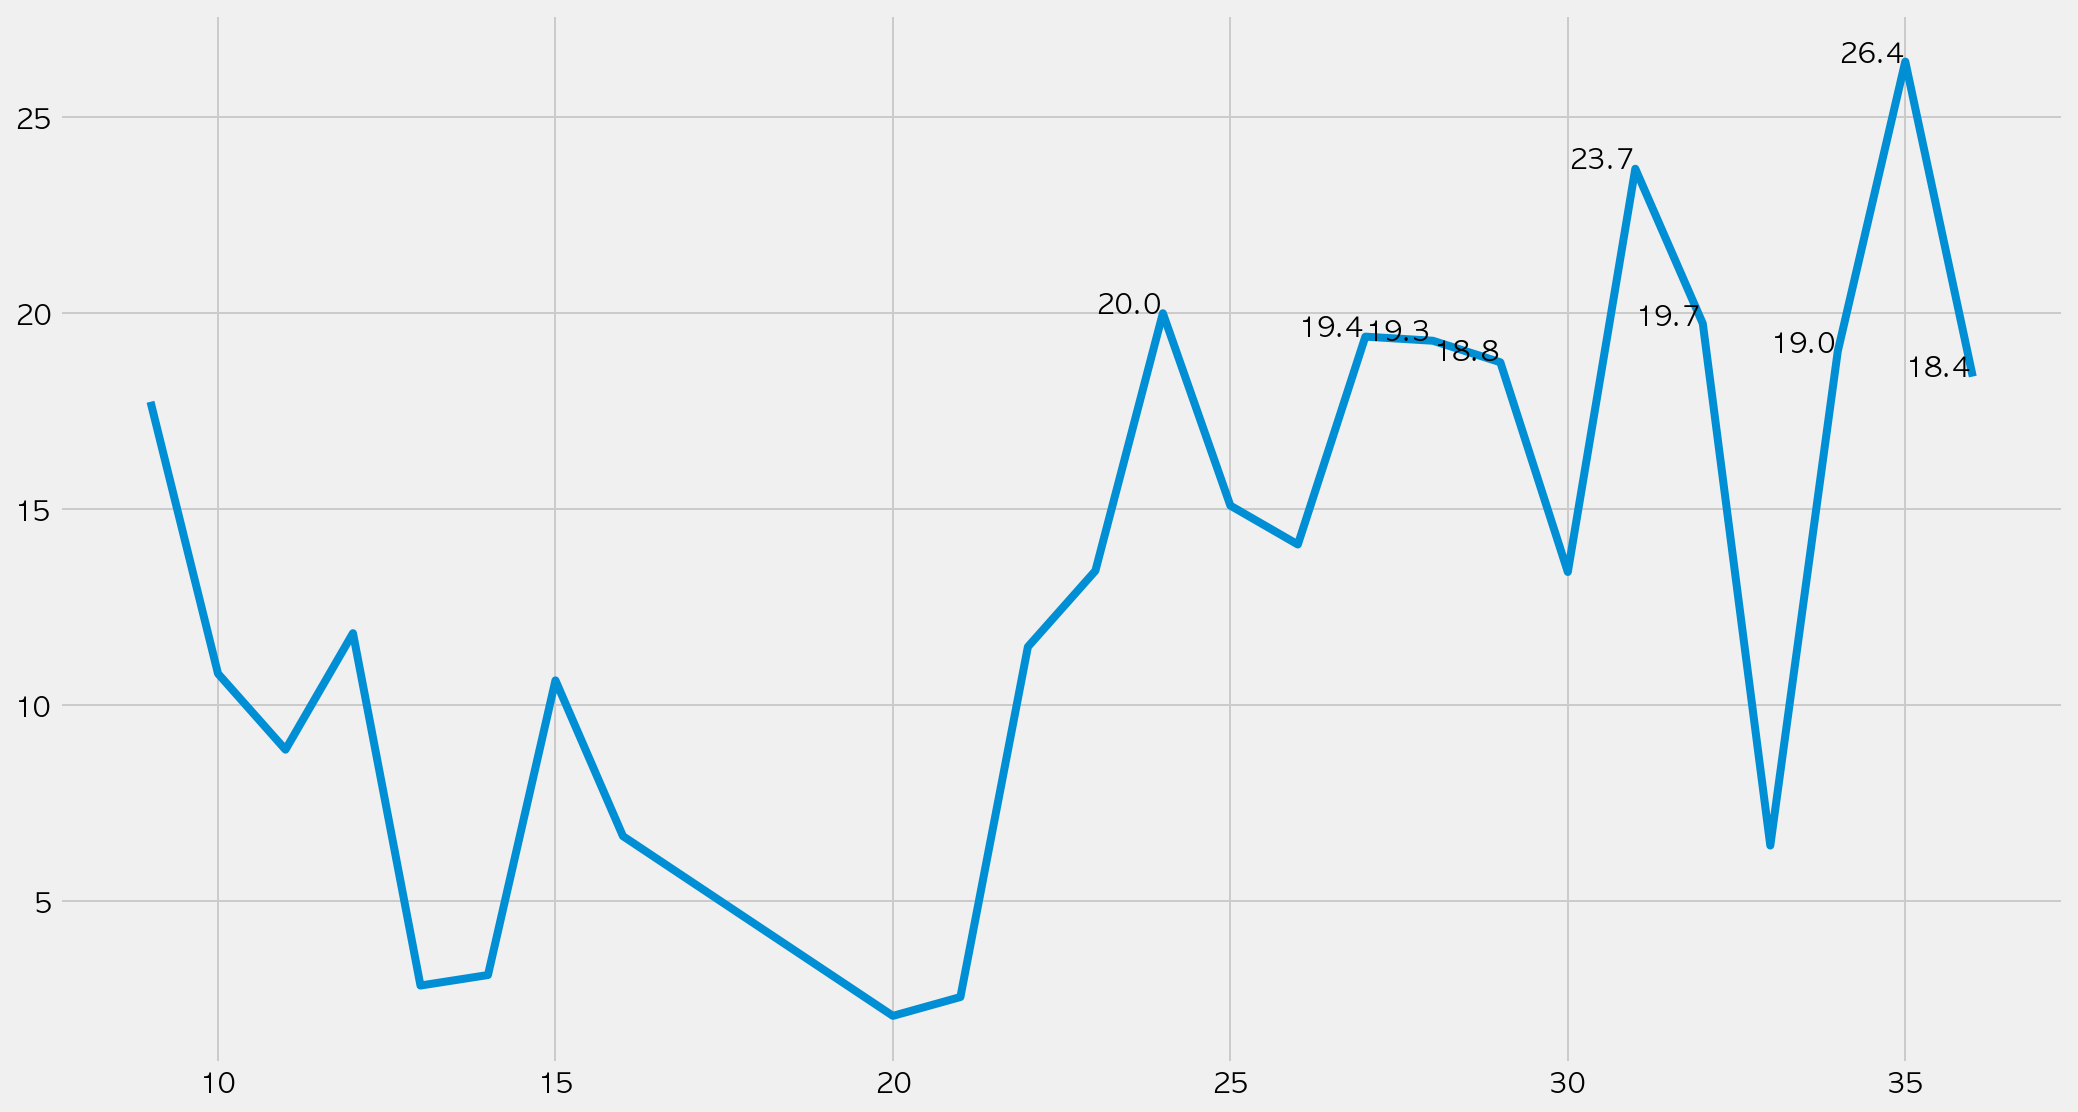

In [87]:
percentage_graph = percentages.plot(figsize=(16,9))

for i in range(len(percentages)):
    percent = percentages.iloc[i]
    percent = round(percent, 1)
    if percent > 18:
        print(percentages.iloc[i])
        percentage_graph.text(x=i+11, y=percent, s=percent)

In [88]:
fig = percentage_graph.get_figure()
fig.savefig('./img/unconfirmed_cases.png')